# Bringing evolution of conv filters to life with Matplotlib

In this notebook Im going to explore how to animate the evolution of convolutional filters throughout the training of a convolutional neural network. By analyzin the first convolutional layer we can spot if the filters are learning how to detect some low level features that can be useful for visual intelligence tasks, like classification. These low level features can be for example, edge detection and color detection. I think this is a good exploratory tool that can throw some light on the training process

For this particular notebook, I'll use pretrained models in Caffe, although it shouldn't be hard to adapt this to other frameworks in the future.

## Visualize only the evolution of filters

In [11]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

shape = (96, 11, 11, 3)

fig = plt.figure()
data = np.random.rand(*shape)
im = plt.imshow(preprocess_data(data))

def preprocess_data(data):
    # normalize data for display
    data = (data - data.min()) / (data.max() - data.min())
    # force the number of filters to be square
    n = int(np.ceil(np.sqrt(data.shape[0])))
    padding = (((0, n ** 2 - data.shape[0]),
                (0, 1), (0, 1))                # add some space between filters
               + ((0, 0),) * (data.ndim - 3))  # don't pad the last dimension (if there is one)
    data = np.pad(data, padding, mode='constant', constant_values=1)  # pad with ones (white)
    # tile the filters into an image
    data = data.reshape((n, n) + data.shape[1:]).transpose((0, 2, 1, 3) + tuple(range(4, data.ndim + 1)))
    data = data.reshape((n * data.shape[1], n * data.shape[3]) + data.shape[4:])
    return data

def init():
    im.set_data(preprocess_data(np.zeros(shape)))

def animate(i):
    data = np.random.rand(*shape)
    im.set_data(preprocess_data(data))
    return im

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=50, repeat = True)
anim.save('im.mp4', metadata={'artist':'Eze'})


/Users/ezetl/anaconda2/envs/py2/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in divide


/Users/ezetl/anaconda2/envs/py2/lib/python2.7/site-packages/ipykernel/__main__.py:30: RuntimeWarning: divide by zero encountered in log


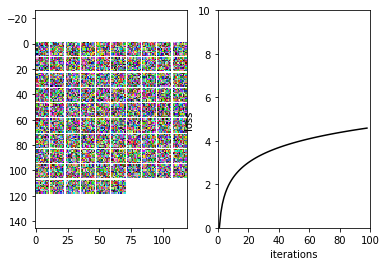

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.animation as animation

shape = (96, 11, 11, 3)

def preprocess_data(data):
    # normalize data for display
    data = (data - data.min()) / (data.max() - data.min())
    # force the number of filters to be square
    n = int(np.ceil(np.sqrt(data.shape[0])))
    padding = (((0, n ** 2 - data.shape[0]),
                (0, 1), (0, 1))                # add some space between filters
               + ((0, 0),) * (data.ndim - 3))  # don't pad the last dimension (if there is one)
    data = np.pad(data, padding, mode='constant', constant_values=1)  # pad with ones (white)
    # tile the filters into an image
    data = data.reshape((n, n) + data.shape[1:]).transpose((0, 2, 1, 3) + tuple(range(4, data.ndim + 1)))
    data = data.reshape((n * data.shape[1], n * data.shape[3]) + data.shape[4:])
    return data

xlim = 100
class SubplotAnimation(animation.TimedAnimation):
    def __init__(self):
        fig = plt.figure()
        ax1 = fig.add_subplot(1, 2, 1)
        ax2 = fig.add_subplot(1, 2, 2)

        self.t = np.arange(0,xlim)
        self.losses = np.log(np.arange(0,xlim))
        self.filters = np.array([preprocess_data(np.random.rand(*shape)) for i in self.t])
        
        self.im = ax1.imshow(self.filters[0])
        ax1.set_aspect('equal', 'datalim')

        ax2.set_xlabel('iterations')
        ax2.set_ylabel('loss')
        self.line2 = Line2D([], [], color='black')
        ax2.add_line(self.line2)
        ax2.set_xlim(0, xlim)
        ax2.set_ylim(0,10)

        animation.TimedAnimation.__init__(self, fig, interval=50, blit=True)

    def _draw_frame(self, framedata):
        i = framedata
        self.line2.set_data(self.t[:i], self.losses[:i])
        self.im.set_data(self.filters[i])

        self._drawn_artists = [self.im, self.line2]
        
    def new_frame_seq(self):
        return iter(range(self.t.size))

    def _init_draw(self):
        self.line2.set_data([], [])
        self.im.set_data(preprocess_data(np.random.rand(*shape)))

ani = SubplotAnimation()
ani.save('test_sub.mp4')
plt.show()